In [26]:
#!/usr/bin/env python
import glob
import math
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties

In [2]:
# define functions:

# Function to calculate the mean from a string containing space separated numbers.
def calculate_mean(numbers_str):
    numbers = [float(x) for x in numbers_str.split()]
    mean = sum(numbers) / len(numbers)
    return mean

# Function to check if a value can be converted to a float.
def is_float(string: any) -> bool:
    if string is None:
        return False
    try:
        float(string)
        return True
    except ValueError:
        return False

# Function to extract all properties from an sdf file. (takes regex paths as input) 
def extract_properties_from_sdf(pathname):
    if not os.path.isfile(pathname):
        print("ERROR: file '%s' is missing!" % pathname)
        quit(1)
    pattern = re.compile("^> *<.*>$")
    all_values = {}
    with open(pathname, "r") as input_file:
        lines = input_file.readlines()
        for index, line in enumerate(lines):
            if pattern.match(line):
                property_name = re.split('<|>', line)[2]
                value_str = lines[index + 1].rstrip()
                if is_float(value_str):
                    all_values[property_name] = float(value_str)
                else:
                    all_values[property_name] = value_str
    return all_values



In [3]:
# Collect paths to all the sdf files of test set 1 in 'pathnames' variable.
# This will assume that the Jupyter-notebook is opened from within the directory in which it is contained.
pathnames = []
regex = str(os.getcwd()+"/../../test/test_set_1/*/*_out.sdf").strip('\'')
pathnames.extend(sorted(glob.glob(regex)))


In [4]:
# store paths to catalyst groups (AF) in separate variables
H0_paths = []; HI_paths = []; HIIprime_paths = []; HII_paths = []; HC1Ph_paths = []
for pathname in pathnames:
    if "H0_" in pathname:
        H0_paths.append(pathname)
    if "HI_" in pathname:
        HI_paths.append(pathname)    
    if "HIIprime_" in pathname:
        HIIprime_paths.append(pathname)
    if "HII_" in pathname:
        HII_paths.append(pathname)
    if "HC1Ph_" in pathname:
        HC1Ph_paths.append(pathname)
        
print("Total number of AF Candidates = " + str(len(H0_paths + HI_paths + HIIprime_paths + HII_paths + HC1Ph_paths)))

Total number of AF Candidates = 30


In [9]:
# Now we calculate the mean of selected sdf properties (energies, descriptor, weights etc.) within each catalyst group.
# The mean values are then stored in separate arrays for further use bellow.
# Finally, we print a simple overview of the fitness, descriptors and weights.

# define arrays containing catalyst groups paths and names.
catalyst_groups = [H0_paths, HI_paths, HIIprime_paths, HII_paths, HC1Ph_paths]
catalyst_name = ['H0', 'HI', 'HIIprime', 'HII', 'HC1Ph']
# All arrays that contains values derived from the set complete of catalyst (test set 1) 
# will adhear to the index above (arr[0] = H0 value, arr[1] = HI value ... ) 

# define arrays containing desired properties (averages).
fitnesses = []; d1s = []; d2s = []; d3s = []; w1s = []; w2s = []; w3s = []; w4s = []
AFenergyA = []; AFenergyE = []; AFenergyF = []; AFenergyC = []; AFenergyD = []; AFenergyX = []; AFenergyZ = []; AFenergyL = []

# define array containing desired properties (standard deviations).
fitnessStds = []; d1Stds = []; d2Stds = []; d3Stds = []; w1Stds = []; w2Stds = []; w3Stds = []; w4Stds = []

# Loop over each catalyst group to extract mean values and standardard deviations. 
i = 0
for group in catalyst_groups:
    rows = []
    for candidate in group:
        rows.append(extract_properties_from_sdf(candidate))
        
    # Definte pandas datafram with all extracted properties, from all candidates.
    df = pd.DataFrame(rows)

    # colelct mean values from descriptors and weights.
    fitness = str(df.agg({'FITNESS': ['mean']})).split()[2]; fitnesses.append(fitness)
    fitnessStd = str(df.agg({'FITNESS': ['std']})).split()[2]
    print('Fitness: ' + str(round(float(fitness), 2)) + ' (St.dev: ' + str(round(float(fitnessStd), 2)) + ')')
    d1 = str(df.agg({'DESCRIPTOR_1': ['mean']})).split()[2]; d1s.append(d1)
    d2 = str(df.agg({'DESCRIPTOR_2': ['mean']})).split()[2]; d2s.append(d2)
    d3 = str(df.agg({'DESCRIPTOR_3': ['mean']})).split()[2]; d3s.append(d3)
    w1 = str(df.agg({'WEIGHT_1': ['mean']})).split()[2]; w1s.append(w1)
    w2 = str(df.agg({'WEIGHT_2': ['mean']})).split()[2]; w2s.append(w2)
    w3 = str(df.agg({'WEIGHT_3': ['mean']})).split()[2]; w3s.append(w3)
    w4 = str(df.agg({'WEIGHT_4': ['mean']})).split()[2]; w4s.append(w4)

    #collect standard deviations from descriptors and weights.
    d1Stds.append(float(str(df.agg({'DESCRIPTOR_1': ['std']})).split()[2]))
    d2Stds.append(float(str(df.agg({'DESCRIPTOR_2': ['std']})).split()[2]))
    d3Stds.append(float(str(df.agg({'DESCRIPTOR_3': ['std']})).split()[2]))
    w1Stds.append(float(str(df.agg({'WEIGHT_1': ['std']})).split()[2]))
    w2Stds.append(float(str(df.agg({'WEIGHT_2': ['std']})).split()[2]))
    w3Stds.append(float(str(df.agg({'WEIGHT_3': ['std']})).split()[2]))
    w4Stds.append(float(str(df.agg({'WEIGHT_4': ['std']})).split()[2]))

    #collect mean values from potential energies.
    AFenergyA.append(float(str(df.agg({'freeEnergyA': ['mean']})).split()[2]))
    AFenergyE.append(float(str(df.agg({'freeEnergyE': ['mean']})).split()[2]))
    AFenergyF.append(float(str(df.agg({'freeEnergyF': ['mean']})).split()[2]))
    AFenergyC.append(float(str(df.agg({'freeEnergyC': ['mean']})).split()[2]))
    AFenergyD.append(float(str(df.agg({'freeEnergyD': ['mean']})).split()[2]))
    AFenergyX.append(float(str(df.agg({'freeEnergyX': ['mean']})).split()[2]))
    AFenergyZ.append(float(str(df.agg({'freeEnergyZ': ['mean']})).split()[2]))
    AFenergyL.append(float(str(df.agg({'freeEnergyL': ['mean']})).split()[2]))

    # print overview.
    print(f"candidate: {catalyst_name[i]}")
    print('D1: ' + str(round(float(d1), 2)))
    print('D2: ' + str(round(float(d2), 2)))
    print('D3: ' + str(round(float(d3), 2)))
    print('w1: ' + str(round(float(w1), 2)))
    print('w2: ' + str(round(float(w2), 2)))
    print('w3: ' + str(round(float(w3), 2)))
    print('w4: ' + str(round(float(w4), 2)))

    i = i + 1



Fitness: 0.0 (St.dev: 0.0)
candidate: H0
D1: 0.0
D2: 1.47
D3: 2.66
w1: 1.0
w2: 0.0
w3: 0.04
w4: 1.0
Fitness: 3.45 (St.dev: 1.71)
candidate: HI
D1: 0.0
D2: 5.17
D3: 0.21
w1: 1.0
w2: 0.69
w3: 0.9
w4: 1.0
Fitness: 13.66 (St.dev: 0.01)
candidate: HIIprime
D1: 0.23
D2: 13.05
D3: 0.38
w1: 1.0
w2: 1.0
w3: 1.0
w4: 1.0
Fitness: 14.95 (St.dev: 0.02)
candidate: HII
D1: 1.0
D2: 13.95
D3: 0.0
w1: 1.0
w2: 1.0
w3: 1.0
w4: 1.0
Fitness: 19.91 (St.dev: 6.86)
candidate: HC1Ph
D1: 5.87
D2: 14.54
D3: 0.0
w1: 0.98
w2: 1.0
w3: 1.0
w4: 1.0


In [8]:
# Extract energies from HQF.

HQF_paths = []
sorted_HQF_names = ['H0HQF', 'HIHQF', 'HIIprimeHQF', 'HIIHQF', 'HC1PhHQF']
sorted_HQF_paths = []

for pathname in pathnames:
    for name in sorted_HQF_names:
        if pathname in name or name in pathname:
            HQF_paths.append(pathname)
for name in sorted_HQF_names:
    for path in HQF_paths:
        if name in path:
            sorted_HQF_paths.append(path) 

patterns = ["> <freeEnergyA>", "> <freeEnergyF>", "> <freeEnergyE>", "> <freeEnergyC>","> <freeEnergyL>", "> <freeEnergyX>", "> <freeEnergyZ>"]
HQFfreeEnergyA = []; HQFfreeEnergyF = []; HQFfreeEnergyE = []; HQFfreeEnergyC = []; HQFfreeEnergyL = []; HQFfreeEnergyX = []; HQFfreeEnergyZ = []
HQFfreeEnergies= [HQFfreeEnergyA, HQFfreeEnergyF, HQFfreeEnergyE, HQFfreeEnergyC, HQFfreeEnergyL, HQFfreeEnergyX, HQFfreeEnergyZ]

for pathname in sorted_HQF_paths:
    i = 0
    with open(pathname, "r") as input_file:
            lines = input_file.readlines()
            for index, line in enumerate(lines):
                for pattern in patterns:
                    pattern = re.compile(pattern)
                    if pattern.match(line):
                        property_name = re.split('<|>', line)[2]
                        value_str = lines[index + 1].rstrip()
                        if is_float(value_str):
                            HQFfreeEnergies[i].append(float(value_str))
                            i = i + 1

In [116]:
# Calculating barriers from HQF energies, then calculate the descriptors, weights and overall fitness.

BarriersBHE_from_precursor = [] # Barriers to B-HE with respect to the precursor 
BarriersMetathesis_from_precursor = [] # Barriers to metathesis with respect to the precursor
BarriersBHE_from_MCB = [] # Barriers to B-HE with respect to the MCB 
BarriersMetathesis_from_MCB = [] # Barriers to metathesis with respect to the MCB
HQF_fitnesses = []; HQFd1s = []; HQFd2s = []; HQFd3s = []; HQFw1s = []; HQFw2s = []; HQFw3s = []; HQFw4s = []

# Defining constants (free energies [hartree] of substrates, conversion factors etc.)
G_ethene = -78.477866552
G_propene = -117.734910132
G_Hoveyda = -502.210801644
hartree_to_kcalmol = 627.4946752
kT = 0.622308995 # NB: in Kcal/mol
epsilon = 5.73163236
delta = 1.43290809
Lambda = 1.43290809
sigma = 2.86581618

ddE_stability_HI = hartree_to_kcalmol * math.fabs(HQFfreeEnergyC[3] - HQFfreeEnergyA[3] - HQFfreeEnergyC[1] + HQFfreeEnergyA[1])

i = 0
if not len(HQFfreeEnergyA) == len(HQFfreeEnergyF) == len(HQFfreeEnergyE) == len(HQFfreeEnergyC) == len(HQFfreeEnergyX) == len(HQFfreeEnergyZ) == len(HQFfreeEnergyL):
    print('Error: inconsistant number of energy values')
    quit(1)
else:
    while i < len(HQFfreeEnergyA):
        # Calculate barriers to B-H elimination wrt. precursor:
        BHE_P = ((HQFfreeEnergyZ[i] + G_Hoveyda) - (HQFfreeEnergyA[i] + (2 * G_ethene))) * hartree_to_kcalmol
        BarriersBHE_from_precursor.append(BHE_P)
        
        # Calculate barriers to metathesis wrt. precursor:
        Metathesis_P = ((HQFfreeEnergyX[i] + G_Hoveyda) - (HQFfreeEnergyA[i] + (2 * G_propene))) * hartree_to_kcalmol
        BarriersMetathesis_from_precursor.append(Metathesis_P)

        # Calculate barriers to B-H elimination wrt. MCB:
        BHE_MCB = (HQFfreeEnergyZ[i] - HQFfreeEnergyC[i]) * hartree_to_kcalmol
        BarriersBHE_from_MCB.append(BHE_MCB)
        
        # Calculate barriers to metathesis wrt. MCB:
        Metathesis_MCB = (HQFfreeEnergyX[i] + (2 * G_ethene) - HQFfreeEnergyC[i] - (2 * G_propene)) * hartree_to_kcalmol
        BarriersMetathesis_from_MCB.append(Metathesis_MCB)
        i = i + 1

i = 0        
while i < len(HQFfreeEnergyA):
    # Calculate descriptor 1 (d1) values:
    HQFd1 = math.exp((( BarriersBHE_from_MCB[i] - BarriersMetathesis_from_MCB[i] ) - ( BarriersBHE_from_MCB[3] - BarriersMetathesis_from_MCB[3] )) / kT )
    HQFd1s.append(HQFd1)

    # Calculate descriptor 2 (d2) values:
    HQFd2 = BarriersBHE_from_MCB[i] - BarriersMetathesis_from_MCB[i]
    HQFd2s.append(HQFd2)

    # Calculate descriptor 3 (d3) values:
    if BarriersMetathesis_from_MCB[3] - BarriersMetathesis_from_MCB[i] > 0:
        HQFd3 = BarriersMetathesis_from_MCB[3] - BarriersMetathesis_from_MCB[i]
        HQFd3s.append(HQFd3)
    else:
        HQFd3 = 0.0
        HQFd3s.append(HQFd3)

    # calculate weight 1 (w1) values:
    HQFw1 = 1 / (1 + math.exp((BarriersMetathesis_from_MCB[i] - (BarriersMetathesis_from_MCB[3] + epsilon) ) / kT))
    HQFw1s.append(HQFw1)

    # calculate weight 2 (w2) values:
    HQFw2 = 1 / (1 + math.exp(((hartree_to_kcalmol * (math.fabs(HQFfreeEnergyC[3] - HQFfreeEnergyA[3] - HQFfreeEnergyC[i] + HQFfreeEnergyA[i])) - (ddE_stability_HI + delta)) / kT)))
    HQFw2s.append(HQFw2)

    # calculate weight 3 (w3) values:
    dE_synt = hartree_to_kcalmol * (HQFfreeEnergyA[i] + HQFfreeEnergyL[1] - HQFfreeEnergyA[1] - HQFfreeEnergyL[i])
    HQFw3 = 1 / (1 + math.exp((dE_synt - Lambda) / kT))
    HQFw3s.append(HQFw3)

    # calculate weight 4 (w4) values:
    dE_stereo = hartree_to_kcalmol * (HQFfreeEnergyF[i] - HQFfreeEnergyA[i])
    HQFw4 = 1 / (1 + math.exp((sigma - dE_stereo) / kT))
    HQFw4s.append(HQFw4)

    HQF_fitness = (HQFd1 + HQFd2 + HQFd3) * HQFw1 * HQFw2 * HQFw3 * HQFw4
    HQF_fitnesses.append(HQF_fitness)
                 
    i = i + 1

print('d1: '+str(HQFd1s))
print('d2: '+str(HQFd2s))
print('d3: '+str(HQFd3s))
print('w1: '+str(HQFw1s))
print('w2: '+str(HQFw2s))
print('w3: '+str(HQFw3s))
print('w4: '+str(HQFw4s))
print('Fitness: '+str(HQF_fitnesses))


d1: [4.853110820266969e-06, 9.467523575950046e-06, 0.22521897006475278, 1.0, 12.762673026559266]
d2: [4.4171458568846305, 4.833002265496361, 11.103985761231115, 12.031650671701689, 13.616375923902666]
d3: [3.175557910262212, 1.1812901008721166, 0.5300673420062534, 0.0, 0.0]
w1: [0.9999993920248166, 0.9999850158830638, 0.9999573330269887, 0.9999000027207697, 0.9996136659678894]
w2: [0.0001337007616411076, 0.9090894050670836, 0.9999968330180677, 0.9999992807625627, 0.9999810381847494]
w3: [0.574609749568363, 0.9090894050481353, 0.9999999671644233, 0.9999999920786594, 0.9999999999971922]
w4: [0.9999997849335648, 0.9999990219812078, 0.9999952554397632, 0.9999894090268125, 0.9999478871809052]
Fitness: [0.0005833151389524978, 4.970401597231086, 11.858671863724615, 13.030200062998029, 26.366983695172014]


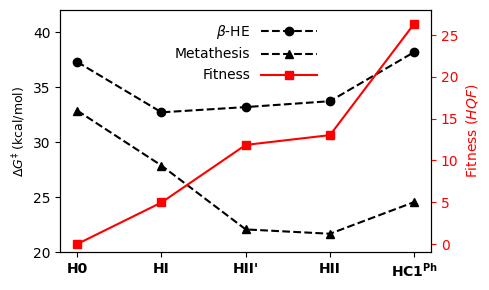

In [112]:
plt.rcParams['font.size'] = 10

catalyst = ["H0", "HI", "HII'", "HII", "$\mathbf{HC1^{Ph}}$"]

fig, ax = subplots(figsize=(5,3))

# Plotting on the primary y-axis
ax.plot(catalyst, BarriersBHE_from_precursor, linestyle='dashed', marker='o', color='black', label='$\\beta$-HE')
ax.plot(catalyst, BarriersMetathesis_from_precursor, linestyle='dashed', marker='^', markerfacecolor='black', color='black', label='Metathesis')

ax.set_xlabel('')
ax.set_ylabel("$\Delta G^{\u2021}$ (kcal/mol)", fontsize=9)

# Creating a secondary y-axis
ax2 = ax.twinx()
ax2.plot(catalyst[0:], HQF_fitnesses[0:], color='red', label='HQF_fitnesses', marker='s', markerfacecolor='red')
ax2.set_ylabel('Fitness ($\mathit{HQF}$)', color='red')

handels = [
    Line2D([0], [0], linestyle='dashed', marker='o', markerfacecolor='black', color='black'),
    Line2D([0], [0], linestyle='dashed', marker='^', markerfacecolor='black', color='black'),
    Line2D([0], [0], linestyle='solid', marker='s', markerfacecolor='red', color='red')
]

labels = [
    '$\\beta$-HE',
    'Metathesis',
    'Fitness'
]

# Adjust legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height])
leg = ax.legend(handels, labels, handlelength=4, markerfirst=False, loc='upper center', ncol=1)
leg.get_frame().set_linewidth(0.0)

# set -y-axis limits for the first axis
ax.set_ylim(20, 42)

# Set y-axis limits for the secondary axis
ax2.set_ylim(-1, 28)

# Set the color of the y-axis ticks for the secondary axis
ax2.tick_params(axis='y', colors='red')

# Set x-axis ticks to bold and not italic
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontproperties(FontProperties(weight='bold', style='normal'))

plt.tight_layout()
#plt.savefig("FitnessEval.svg", format="svg", bbox_inches="tight")
plt.show()